# Table of Contents


1. [Introduction](#Introduction)
2. [Stock](#Stock)
    1. [Comparison](#Comparison)
    2. [Dimension Reduction](#Dimension-Reduction-(PAA-&-SAX))
3. [News](#News)
    1. [WordCloud](#WordCloud)
4. [Tweets](#Tweets)
    1. [Sentiment](#Sentiment)


# Introduction

This project undertakes some of the challenges in the data mining process in order to get insight <br> from the data that had been collected from several resources as follow:
* [Stocks](https://www.thestar.com.my/business/marketwatch/)
* [News](https://www.thestar.com.my/business/marketwatch/)
* [Tweets](https://twitter.com)

The main obstacle and limitation of this project is the short data collection period which is from 2019-02-25 to 2019-03-29

> The analysis goal is to understand the dramatic drop for the mentioned period of time for AirAsia company



![Air Asia](./img/airasia.png)

# Stock

In [1]:
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt

In [2]:
stock = pd.read_csv('data/the_star_data.csv')

In [3]:
stock.head(2)

,ID,Datetime,CompanySymbol,OpenPrice,HighPrice,LowPrice,LastPrice
0,207649,13 Mar 2019 - 7:13 PM,3A,0.85,0.855,0.845,0.850
1,207650,13 Mar 2019 - 7:13 PM,A50CHIN-C22,0.14,0.145,0.120,0.135


In [4]:
# split the 'Datetime' column into separate 'Date' and 'Time' columns
stock[['Date', 'Time']] = stock['Datetime'].str.split('-', expand=True)

In [5]:
# transfer the 'Date' column into datetime format 
stock['Date'] = pd.to_datetime(stock['Date'])

In [6]:
# selecting useful columns
stock = stock[['Date', 'CompanySymbol', 'OpenPrice', 'HighPrice', 'LowPrice', 'LastPrice']]

In [7]:
stock.count()

Date             350406
CompanySymbol    350406
OpenPrice        350406
HighPrice        350406
LowPrice         350406
LastPrice        350406
dtype: int64

In [8]:
# creating AirAsia and Airport dataframes
airasia = stock[stock.CompanySymbol == 'AIRASIA']
airport = stock[stock.CompanySymbol == 'AIRPORT'] 

In [9]:
# Dropping duplicate dates
airasia = airasia.drop_duplicates(subset = 'Date')
airport = airport.drop_duplicates(subset = 'Date')

In [10]:
# set date as the index
airasia = airasia.set_index('Date')
airport = airport.set_index('Date')

In [11]:
airasia.head()

,CompanySymbol,OpenPrice,HighPrice,LowPrice,LastPrice
Date,,,,,
2019-03-13,AIRASIA,2.77,2.83,2.74,2.79
2019-02-27,AIRASIA,3.12,3.12,3.00,3.04
2019-03-20,AIRASIA,2.80,2.81,2.77,2.79
2019-03-11,AIRASIA,2.76,2.79,2.75,2.77
2019-03-01,AIRASIA,2.77,2.79,2.69,2.74


In [12]:
airasia.LastPrice.unique()

array([2.79, 3.04, 2.77, 2.74, 3.13, 2.7 , 2.8 , 2.87, 2.66, 2.82, 2.78,
       2.76, 3.06, 2.83, 2.71, 3.1 ])

In [13]:
airasia.LastPrice.mean()

2.819230769230769

In [14]:
airasia.LastPrice.std()

0.12393298437213804

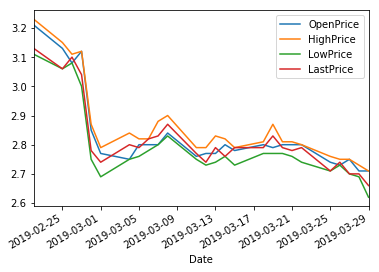

In [15]:
airasia.plot()

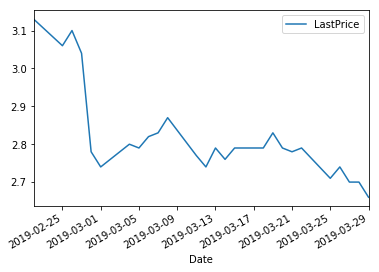

In [16]:
airasia.plot(y = 'LastPrice')

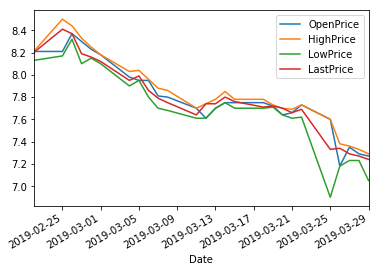

In [17]:
airport.plot()

In [18]:
airport.loc['2019-03-25']

,CompanySymbol,OpenPrice,HighPrice,LowPrice,LastPrice
Date,,,,,
2019-03-25,AIRPORT,7.6,7.6,6.9,7.33


# Comparison

This section compares the airasia's LastPrice with the airport's LastPrice using correlation and covariance. <br>
In order to calculate the covariance, both time series must be normalised and become on the same scale. <br>
Here MinMaxScaler from preprocessing sci-kit learn is used.

In [19]:
airasia = airasia[['LastPrice']]
airport = airport[['LastPrice']]

In [20]:
# Join airasia and airport on the date
compare = airasia.merge(airport, on='Date', how='outer')

In [21]:
# Add column name
compare.columns = ['airasia', 'airport']

In [22]:
compare.head()

,airasia,airport
Date,,
2019-03-13,2.79,7.74
2019-02-27,3.04,8.19
2019-03-20,2.79,7.70
2019-03-11,2.77,7.64
2019-03-01,2.74,8.12


In [23]:
from sklearn import preprocessing

In [24]:
# Normalize both LastPrices and convert to dataframe 
min_max_scaler = preprocessing.MinMaxScaler()
scaled = min_max_scaler.fit_transform(compare)
scaled_df = pd.DataFrame(scaled)
scaled_df.columns = ['airasia','airport']
scaled_df.head()

,airasia,airport
0,0.276596,0.427350
1,0.808511,0.811966
2,0.276596,0.393162
3,0.234043,0.341880
4,0.170213,0.752137


In [25]:
scaled_df.cov()

,airasia,airport
airasia,0.069531,0.057953
airport,0.057953,0.078254


In [26]:
compare.corr()

,airasia,airport
airasia,1.000000,0.785657
airport,0.785657,1.000000


# Dimension Reduction (PAA & SAX)

Time series have a high dimensional nature due to an unlimited range of data points that they can have. In this section, the well known [SAX](https://tslearn.readthedocs.io/en/latest/auto_examples/plot_sax.html#sphx-glr-auto-examples-plot-sax-py) dimension reduction algorithm for time series is demonstrated. SAX reduce the data points to 8 symbols. In order to perform SAX, the time series must be converted to raw data first followed by PAA.

In [27]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation, OneD_SymbolicAggregateApproximation

Text(0.5, 1.0, 'Raw time series')

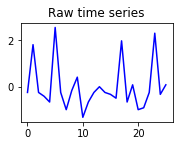

In [28]:
# TS (normalize the company's ts with mean of 0 and std of 1)
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
dataset = scaler.fit_transform(airasia.LastPrice)

plt.figure()
plt.subplot(2, 2, 1)  # First, raw time series
plt.plot(dataset[0].ravel(), "b-")
plt.title("Raw time series")

Text(0.5, 1.0, 'PAA')

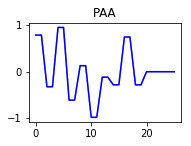

In [29]:
# PAA transform (and inverse transform) of the data
n_paa_segments = 10
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
paa_dataset_inv = paa.inverse_transform(paa.fit_transform(dataset))


plt.subplot(2, 2, 2)  # Second, PAA
plt.plot(paa_dataset_inv.ravel(), "b-", alpha=0.4)
plt.plot(paa_dataset_inv.ravel(), "b-")
plt.title("PAA")

Text(0.5, 1.0, 'SAX, 8 symbols')

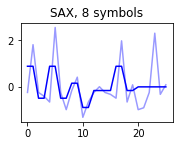

In [30]:
# SAX transform
n_sax_symbols = 8
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)
sax_dataset_inv = sax.inverse_transform(sax.fit_transform(dataset))


plt.subplot(2, 2, 3)  # Then SAX
plt.plot(dataset[0].ravel(), "b-", alpha=0.4)
plt.plot(sax_dataset_inv[0].ravel(), "b-")
plt.title("SAX, %d symbols" % n_sax_symbols)

Text(0.5, 1.0, '1d-SAX, 64 symbols (8x8)')

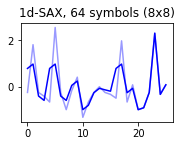

In [31]:
# 1d-SAX transform
n_sax_symbols_avg = 8
n_sax_symbols_slope = 8
one_d_sax = OneD_SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols_avg,
                                                alphabet_size_slope=n_sax_symbols_slope)
one_d_sax_dataset_inv = one_d_sax.inverse_transform(one_d_sax.fit_transform(dataset))

plt.subplot(2, 2, 4)  # Finally, 1d-SAX
plt.plot(dataset[0].ravel(), "b-", alpha=0.4)
plt.plot(one_d_sax_dataset_inv[0].ravel(), "b-")
plt.title("1d-SAX, %d symbols (%dx%d)" % (n_sax_symbols_avg * n_sax_symbols_slope,
                                          n_sax_symbols_avg,
                                          n_sax_symbols_slope))


# News

This section gets the related news story in the specified interval of time to find out the frequent key terms during this period. 

In [32]:
news = pd.read_csv('data/news.csv')

In [33]:
news.head(2)

,link,headline,category,date,timestamp,story
0,https://www.thestar.com.my/business/business-n...,"Buffett's Berkshire says vice chairmen Jain, A...",Corporate News,"Saturday, 16 Mar 2019",6:47 AM MYT,NEW YORK: Berkshire Hathaway Inc on Friday sai...
1,https://www.thestar.com.my/business/business-n...,"Global stocks gain on trade, Brexit optimism, ...",Markets,"Saturday, 16 Mar 2019",6:55 AM MYT,NEW YORK: A gauge of global equity markets hit...


In [34]:
# split the 'date' column into separate 'week_day' and 'date' columns
news[['week_day', 'date']] = news['date'].str.split(',', expand=True) 

In [35]:
# transfer the 'date' column into datetime format 
news['date'] = pd.to_datetime(news['date'])

In [36]:
news.category.unique()

array(['Corporate News', 'Markets', 'Business News', 'Economy',
       'Oil & Gas', 'Palm Oil', 'Airlines', 'Forex', 'Plantations',
       'Cryptocurrency', 'Analyst Reports', 'Banking', 'Property',
       'Construction', 'Stock on the Move', 'Auto', 'e-Commerce', '1MDB',
       'Insurance', 'Support Line', 'Telcos', 'SMEBiz', 'Nation',
       'Investment', 'Technology', 'ASEAN', 'Advertising & Media', 'M&A',
       'Stocks Analysis', 'Retail', 'Utilities', 'Taxation',
       'Short Position', 'SME', 'Fintech'], dtype=object)

In [37]:
# select the news related to the airline category
airline_news = news[news.category == 'Airlines']

In [38]:
# selecting useful columns
airline_news = airline_news[['date', 'story']]

In [39]:
# slicing news that are outside the duration of interest
airline_news = airline_news[(airline_news.date > '2019-02-25') & (airline_news.date < '2019-03-29')]

In [40]:
# set date as the index
airline_news = airline_news.set_index('date')

In [41]:
# sort by date
airline_news.sort_values('date')

,story
date,
2019-03-08,TOKYO: Just as a tide of cancelled orders has ...
2019-03-08,KUALA LUMPUR: AirAsia X Bhd has announced the...
2019-03-08,"HANDAN, China: Every Saturday, Chinese farmer ..."
2019-03-09,"Every three to four years or so, Malaysia Airl..."
2019-03-11,KUALA LUMPUR: Malaysia Airlines Bhd said it ha...
2019-03-12,Petaling Jaya: Shutting down troubled Malaysia...
2019-03-12,SINGAPORE: Singapore became the latest nation ...
2019-03-12,TOKYO: Malaysia may have to reconsider the pur...
2019-03-12,BEIJING: Boeing Co chief executive officer Den...


# WordCloud

[WordCloud](https://amueller.github.io/word_cloud/index.html) is a common visualization tool to emphasis on the terms used based on their frequency in the text. this will help to see what are the keywords that have been mentioned the most in the news during this period. In order to have a better understanding, there are two kinds of noises that should be removed from the text. Firstly, the common English stopwords followed by the stopwords related to the news reporting. Some example of the news related stopwords are (said, Reuters, Washington, months and weekdays)

In [42]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import numpy as np

In [43]:
# selecting an image for the mask
img = Image.open('./img/airplane.jpg')
mask = np.array(img)

In [44]:
# creating a list of news stopwords and add them to the English stopwords
air_sw = {'said', 'company', 'two', 'one', 'max', 'year', 'years', 'bhd', 'washington', 'reuters', 'following', 
          'statement', 'co', 'week',  'will', 'plane', 'planes', 'flight', 'flights', 'aircraft', 'mas', 
          'kuala lumpur', 'singapore', 'malaysia', 'airport', 'world', 'biggest', 'yet', 'group', 'october',
          'kuala' ,'lumpur', 'wednesday', 'flights', 'airports', 'malaysian', 'now', 'past', 'may'}
stopwords = set(STOPWORDS)
stopwords = stopwords.union(air_sw)

In [45]:
# convert the stories to lower case
content = ''
for story in airline_news.story:
    content += str(story).lower() + ' '

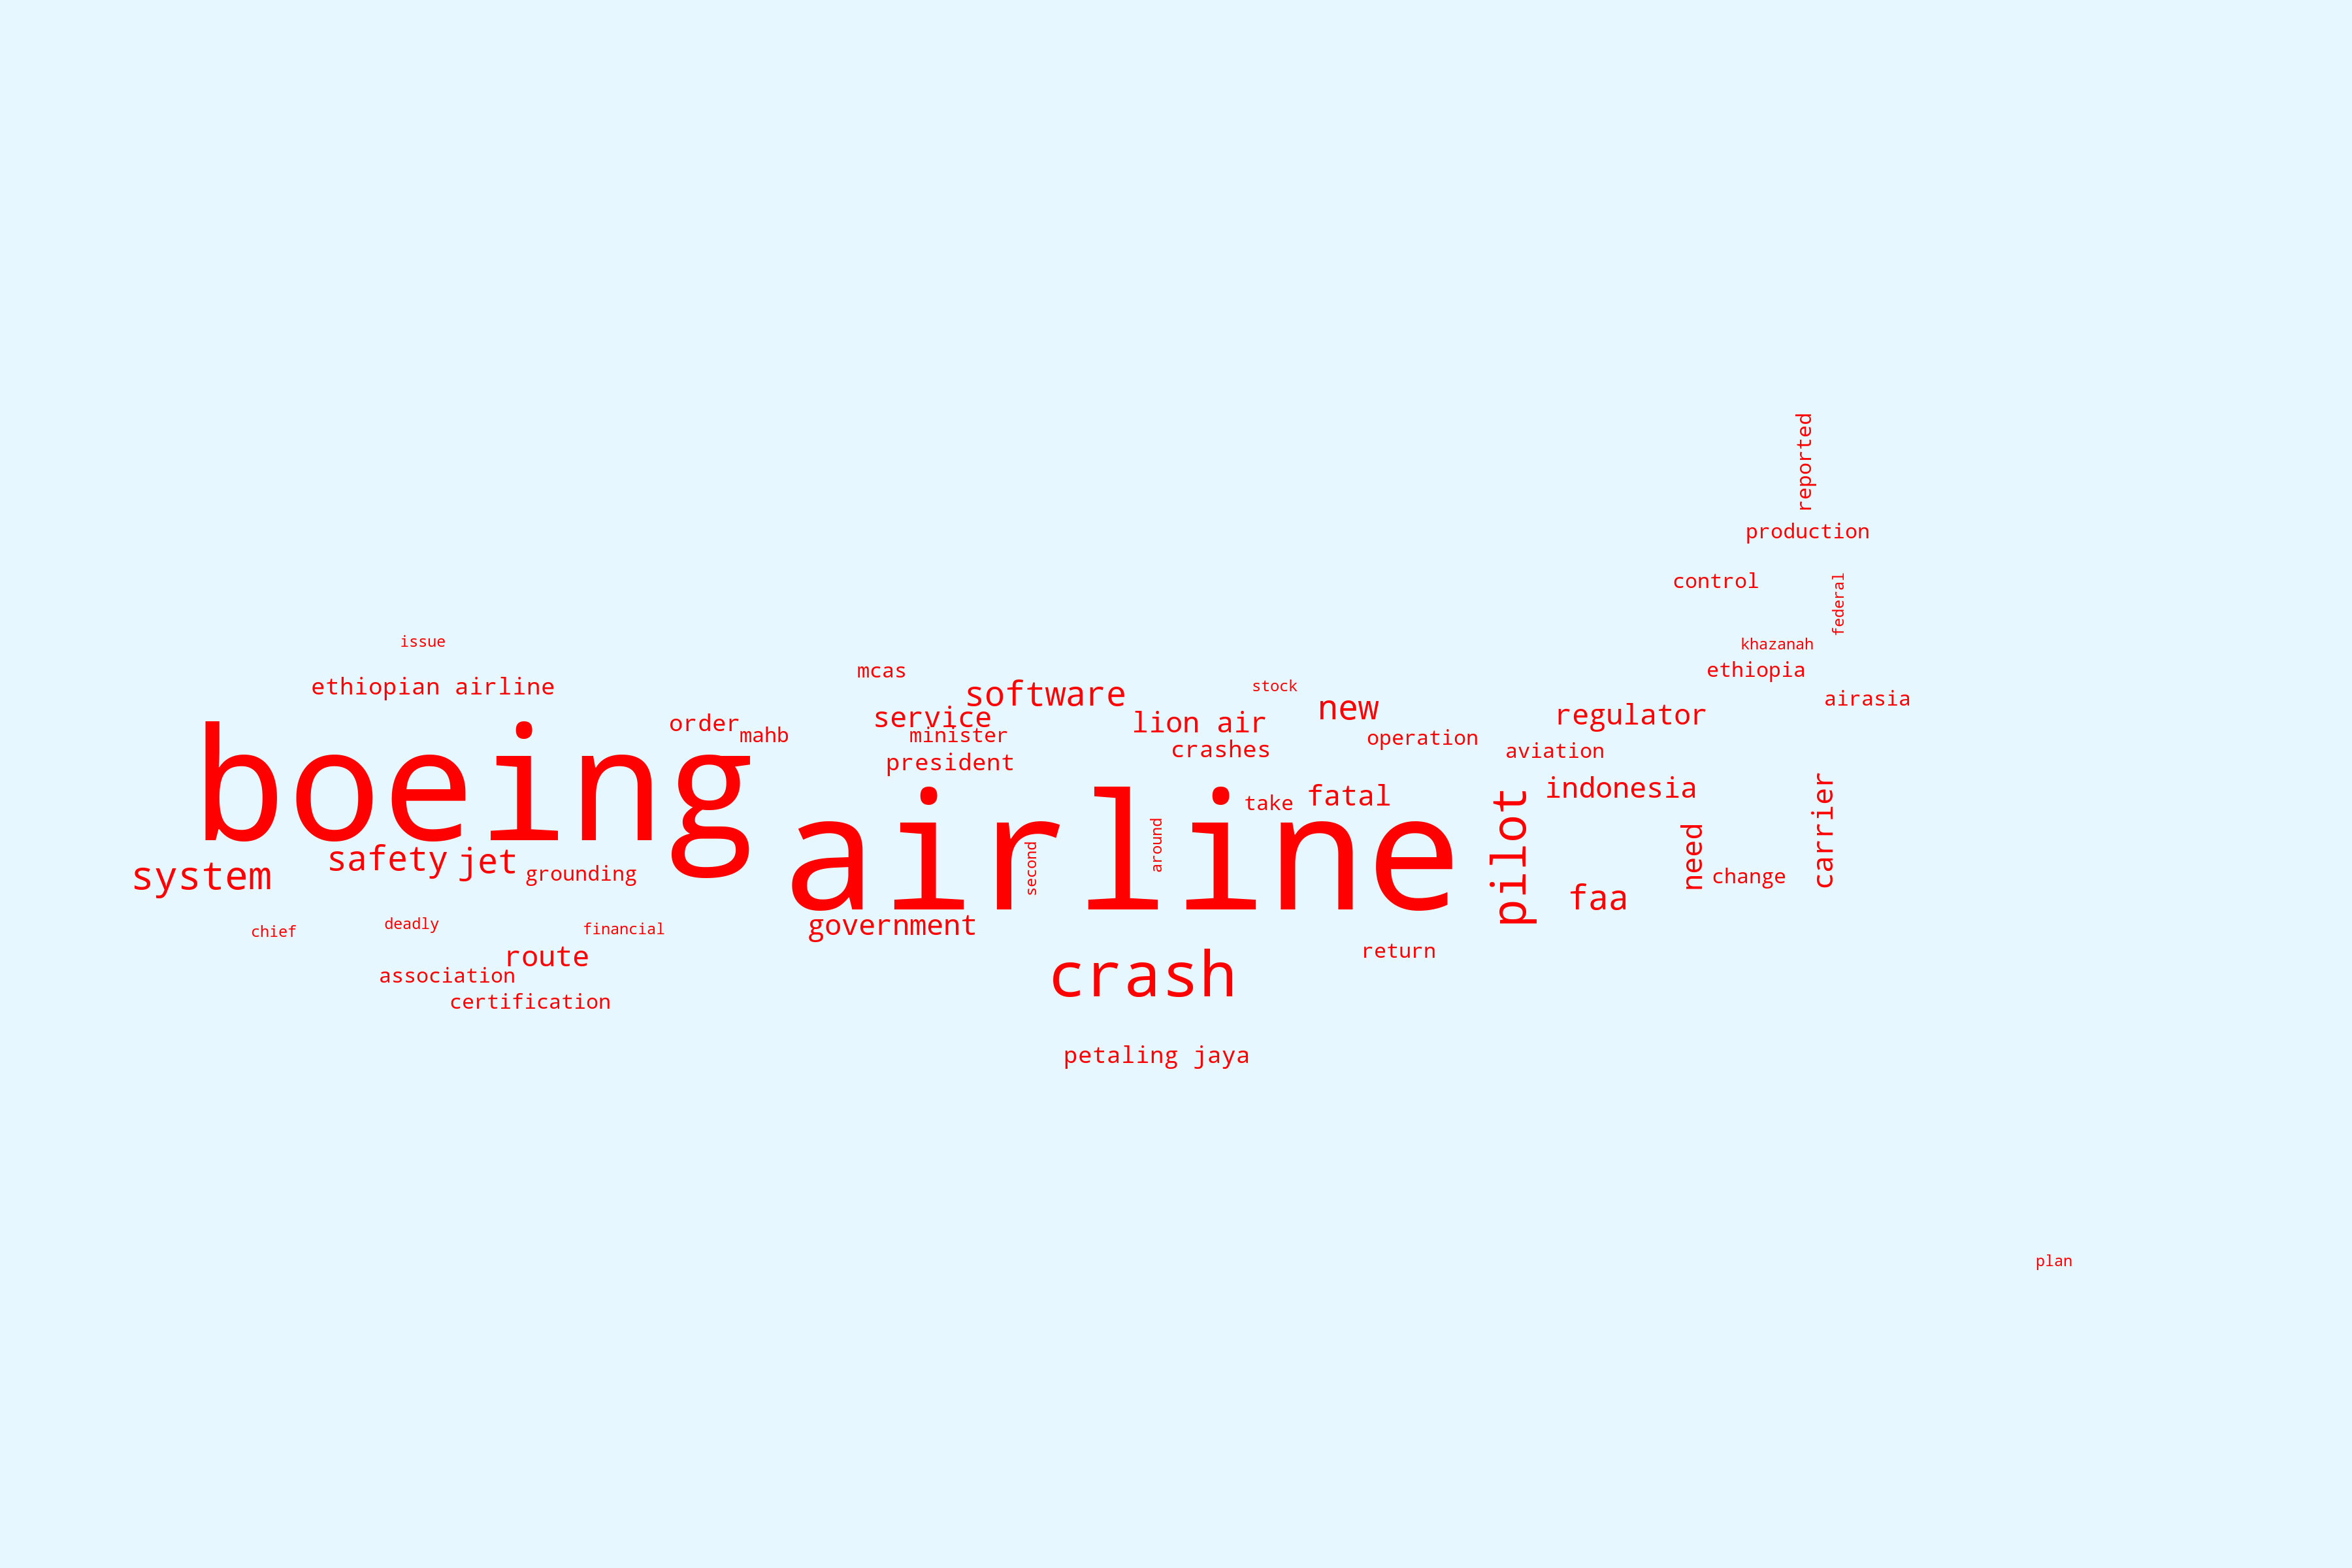

In [46]:
# creating the wordcloud
wc = WordCloud(background_color='#e6f7ff',
               scale=4,
               relative_scaling=1.0,
               stopwords=stopwords,
               max_words=50,
               color_func=lambda *args, **kwargs: 'red',
               mask=mask)
wc.generate(content)
wc.to_image()

In [47]:
#wc.to_file('img/wc.png') 

# Tweets

This section gets the tweets from related companies and sort by favourite count.

In [48]:
tweets = pd.read_csv('data/tweets.csv')

In [49]:
tweets.count()

company_fullname    2746
tweet_text          2746
favorite_count      2746
created_at          2746
hashtags             468
tweet_id            2746
lang                2746
urls                 624
user_followers      2746
user_screen_name    2746
crawling_time       2746
dtype: int64

In [50]:
tweets.head(2)

,company_fullname,tweet_text,favorite_count,created_at,hashtags,tweet_id,lang,urls,user_followers,user_screen_name,crawling_time
0,AIRASIA X,RT @SFJ_JA22MC: エアアジアのスペマ、\nアプリゲームの「ドールズフロントライ...,0,Wed Mar 27 21:54:44 +0000 2019,NaN,1111023773270958080,ja,NaN,263,yoshirin0150701,2019-03-31|20:12
1,AIRASIA X,RT @SFJ_JA22MC: エアアジアのスペマ、\nアプリゲームの「ドールズフロントライ...,0,Wed Mar 27 20:57:22 +0000 2019,NaN,1111009339903344640,ja,NaN,302,8tlk2hOgrBbWlpe,2019-03-31|20:12


In [51]:
# check for any related hashtag
tweets[tweets.hashtags == "airasia"]

,company_fullname,tweet_text,favorite_count,created_at,hashtags,tweet_id,lang,urls,user_followers,user_screen_name,crawling_time


In [52]:
# used languages
tweets.lang.unique()

array(['ja', 'en', 'th', 'in', 'tl', 'pt', 'es', 'und', 'hi', 'it', 'ro',
       'de', 'tr', 'nl', 'ru', 'vi', 'et', 'ca', 'cy', 'fi', 'zh', 'lt',
       'fr', 'sv', 'ko', 'is', 'pl', 'kn', 'da', 'lv', 'eu'], dtype=object)

In [53]:
# select English ones
tweets = tweets[tweets.lang == 'en']

In [54]:
# check different companies
tweets.company_fullname.unique()

array(['AIRASIA X', 'AFFIN BANK', 'AIRASIA GROUP', 'AJINOMOTO', 'AJIYA',
       'AMVERTON', 'ANCOM', 'APFT', 'A-RANK', 'ASTRO MALAYSIA HOLDINGS',
       'AVILLION', 'AWC', 'BRITISH AMERICAN TOBACCO', 'BCB', 'BATU KAWAN',
       'BURSA MALAYSIA', 'C.I. HOLDINGS', 'CME GROUP', 'COMFORT GLOVES',
       'CUSCAPI', 'COUNTRY VIEW', 'DEGEM', 'DESTINI', 'DRB-HICOM',
       'UEM EDGENTA', 'EWEIN', 'ECO WORLD INTERNATIONAL',
       'FAR EAST HOLDINGS', 'FGV HOLDINGS', 'GAMUDA', 'GENTING',
       'GOLDEN LAND', 'GOPENG', 'GREEN PACKET', 'HIBISCUS PETROLEUM',
       'HONG LEONG BANK', 'IGB', 'INTEGRATED LOGISTICS', 'INSAS',
       'IOI PROPERTIES GROUP', 'JAG', 'JHM CONSOLIDATION', 'JOHORE TIN',
       'KOSSAN RUBBER INDUSTRIES', 'LANDMARKS', 'MAGNUM', 'MALTON',
       'MATANG', 'MAXIS', 'MALAYAN BANKING', 'MCT', 'MEDIA PRIMA', 'MGB',
       'MINHO', 'MISC', 'MKH', 'MANAGEPAY SYSTEMS',
       'MUHIBBAH ENGINEERING', 'N2N CONNECT', 'NESTLE', 'NYLEX', 'OCB',
       'ORION IXL', 'PUBLIC BANK', 'PETRO

In [55]:
# select tweets from 'AirAsia X' and 'AirAsia Group' companies
tweets = tweets[(tweets.company_fullname == 'AIRASIA X') | (tweets.company_fullname == 'AIRASIA GROUP')]

In [56]:
# selecting useful columns
tweets = tweets[['tweet_text', 'favorite_count']]

In [57]:
# remove retweets
tweets = tweets[~tweets.tweet_text.str.contains('RT')]

In [58]:
# sort by favourite count
tweets = tweets.sort_values('favorite_count', ascending=False)

In [59]:
tweets

,tweet_text,favorite_count
26,2019/03/27 FUK/RJFF\nAirAsia X\nAirbus A330-34...,13
59,.@AirAsia Group CEO @tonyfernandes on spectacu...,6
13,Highlight: AirAsia X blames ex-local partner o...,4
72,Our c-suite interview with #AirAsia Group CEO ...,3
5,"AirAsia X considers routes to Europe, US mainl...",1
9,Wednesday's #aviation #news including AirAsia ...,1
3,@AirAsia X considers returning to #Europe over...,0
14,AirAsia X blames ex-local partner on late paym...,0
24,"AirAsia X, Airbus finalizing details on potent...",0
38,AirAsia Group eyes disruption in Southeast Asi...,0


# Sentiment

This section undertakes sentiment analysis to understand the polarity on the selected tweets using TextBlob. <br>
The polarity of a tweet shows that whether it is positive or negative. 

In [60]:
from textblob import TextBlob

In [61]:
# create polarity column to apply tweet's polarity 
tweets['SentimentPolarity'] = tweets['tweet_text'].apply(lambda txt: TextBlob(txt).sentiment.polarity)

In [62]:
# sort by polarity
tweets.sort_values('SentimentPolarity', ascending=False)

,tweet_text,favorite_count,SentimentPolarity
9,Wednesday's #aviation #news including AirAsia ...,1,0.166667
24,"AirAsia X, Airbus finalizing details on potent...",0,0.125000
3,@AirAsia X considers returning to #Europe over...,0,0.122222
26,2019/03/27 FUK/RJFF\nAirAsia X\nAirbus A330-34...,13,0.000000
72,Our c-suite interview with #AirAsia Group CEO ...,3,0.000000
5,"AirAsia X considers routes to Europe, US mainl...",1,0.000000
38,AirAsia Group eyes disruption in Southeast Asi...,0,0.000000
46,AirAsia Group eyes disruption in Southeast Asi...,0,0.000000
51,AirAsia Group eyes disruption in Southeast Asi...,0,0.000000
94,Come on ⁦@AirAsia⁩. Pay up\n\nAirAsia Group ow...,0,0.000000


In [63]:
# the most positive tweet
tweets.tweet_text[9]

"Wednesday's #aviation #news including AirAsia X, Airbus finalizing details on potential #A321neoLR order , trivia &amp; more from the netAirspace Daily : https://t.co/bKSFJLmNhD"

In [64]:
# the most negative tweet
tweets.tweet_text[14]

"AirAsia X blames ex-local partner on late payments to Nepal's airport\n\n👇👇Clcik the link for details:\nhttps://t.co/iRIMn0GSjR\n\nFollow us for property updates!\n#kltu #malaysia #property #kl"